# 0823 다변량 분석-통계

In [19]:
# 공통 코드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager,rc
import seaborn as sns



if platform.system()=='Darwin':
	rc('font',family='AppleGothic')
elif platform.system()=='Windows':
	font_name=font_manager.FontProperties(fname='c:/windows/Fonts/malgun.ttf').get_name()

	rc('font',family=font_name)

	

# 그래프에 음수를 사용하기 위한 설정
plt.rcParams['axes.unicode_minus']=False

1. 범주형과 범주형 데이터의 분포 확인

In [4]:
# 분할표 사용 - 범주형과 범주형 데이터의 분포를 확인
lc_loans=pd.read_csv('./data/lc_loans.csv')
print(lc_loans.info())
lc_loans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450961 entries, 0 to 450960
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   status  450961 non-null  object
 1   grade   450961 non-null  object
dtypes: object(2)
memory usage: 6.9+ MB
None


,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [8]:
# grade 별로 status 의 개수를 확인
crosstab=lc_loans.pivot_table(index='grade',columns='status',aggfunc=lambda x:len(x),margins=True)

# margin -> 화면 만드는 view 프로그래밍에서 컨텐츠와 컨텐츠 사이의 여백. 
# 통계분야에서는 전체에 관련된 집계 데이터를 의미

crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [10]:
# grade 의 비율을 표시하기 위한 교차 분할 표
df=crosstab.copy().loc['A':'G'] # 복제
df.loc[:,'Charged Off':'Late']=df.loc[:,'Charged Off':'Late'].div(df['All'],axis=0)
df['All']=df['All']/sum(df['All'])
print(df)

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187


2. 범주형과 수치형 데이터의 분포 확인

In [12]:
airline=pd.read_csv('./data/airline_stats.csv')
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


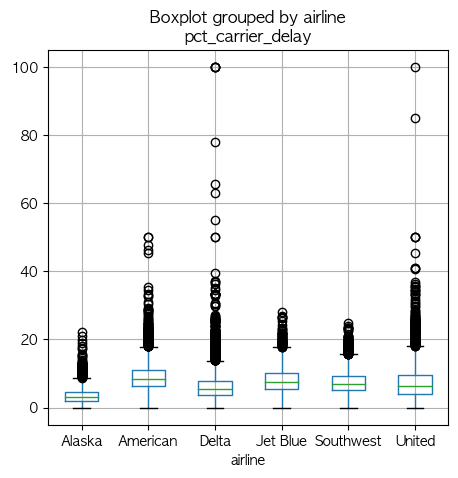

In [18]:
# 항공사별 연착시간을 확인

# 값의 범위를 확인할순 있지만 분포까지 확인하기는 어렵다. 
ax=airline.boxplot(by='airline',column='pct_carrier_delay',figsize=(5,5))


plt.show()

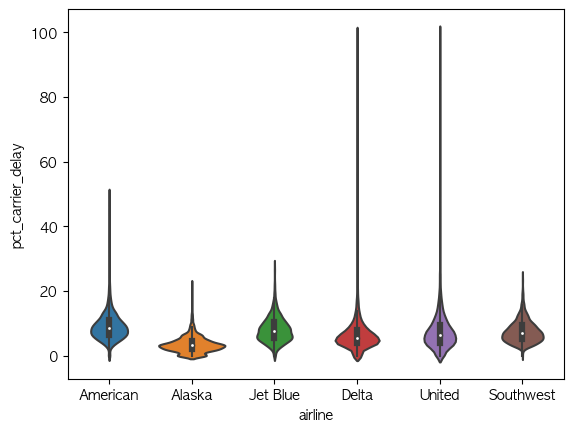

In [24]:
sns.violinplot(data=airline,x='airline',y='pct_carrier_delay')
plt.show()

3. 조건화 
- 교차 분할표나 산점도 육각형 구간 등의 차트를 특정 변수의 값으로 비교하기 위한것.